[CRQ1]: Does the fare for mile change across NY's borough? We want to discover whether the expenses of a user that enjoys Taxis in one zone is different from those that uses it in another one.

Considering the fare amount:
Compute the price per mile  for each trip.
Run the mean and the standard deviation of the new variable for each borough. Then plot the distribution. What do you see?
Run the t-test among all the possible pairs of distribution of different boroughs.
Can you say that statistically significant differences, on the averages, hold among zones? In other words, are Taxis trip in some boroughs, on average, more expensive than others?

In [2]:
#Libraries
import pandas as pd
import numpy as np
from collections import defaultdict
import seaborn as sns 
%matplotlib inline
import matplotlib.pyplot as plt
import functions
import datetime
from scipy.stats import chi2_contingency, ttest_ind ,chisquare, kruskal


In [5]:
# directory path for csv files (dataset from Jan to Jun 2018)
df_names=['data/yellow_tripdata_2018-01.csv','data/yellow_tripdata_2018-02.csv',
          'data/yellow_tripdata_2018-03.csv','data/yellow_tripdata_2018-04.csv',
         'data/yellow_tripdata_2018-05.csv','data/yellow_tripdata_2018-06.csv']

# taxi_zone_lookup.csv file
taxi_zone_lookup = pd.read_csv('data/taxi_zone_lookup.csv')

# names of the boroughs
borough_lst = list(np.unique(taxi_zone_lookup.Borough))
borough_lst.pop()

'Unknown'

In [3]:
from importlib import reload
reload(functions)

<module 'functions' from '/Users/miguel/Desktop/HW2/ADMSecondHomework/functions.py'>

In [6]:
df = functions.make_df_price_per_mile(df_names, taxi_zone_lookup)

In [8]:
# making a boro_dict with all borought in a datafram
boro_dict = functions.make_boro_dict(df,borough_lst)

## compute the mean and the standard deviation

In [9]:
# mean and std table for each borough
mean_std_table = functions.mean_std_table(boro_dict,borough_lst, 'price_per_mile')
mean_std_table

,Borough,Mean,Std
0,Bronx,4.840,2.081
1,Brooklyn,4.985,1.902
2,EWR,4.418,2.977
3,Manhattan,6.085,2.326
4,Queens,3.471,1.360
5,Staten Island,4.260,2.655


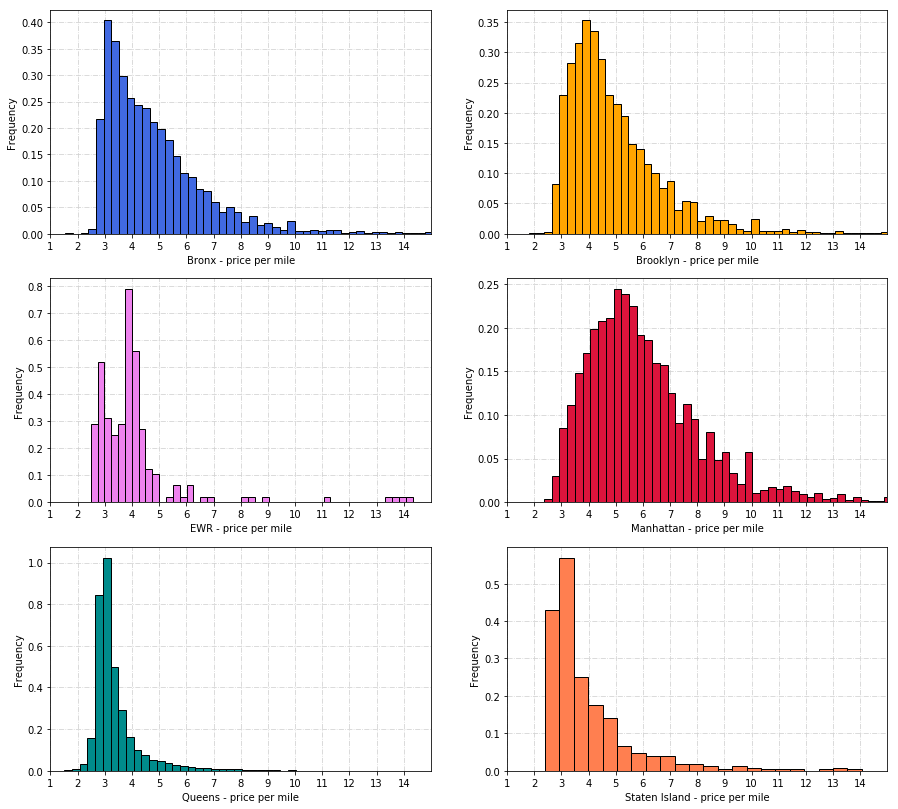

In [10]:
# plot the price_per_mile for each borough
functions.plot_price_per_mile(boro_dict,borough_lst)

Run the mean and the standard deviation of the new variable for each borough. Then plot the distribution. What do you see?

### Run the t-test among all the possible pairs of distribution of different boroughs

- **H0 : mean of the independent sample are different**
- **H1: mean of the independent sample are equal**

In [11]:
from importlib import reload
reload(functions)

<module 'functions' from '/Users/miguel/Desktop/HW2/ADMSecondHomework/functions.py'>

In [12]:
#p value table for price_per_mile
functions.p_value_table(boro_dict, borough_lst, 'price_per_mile')


,Bronx,Brooklyn,EWR,Manhattan,Queens,Staten Island
Bronx,1,0,0.005,0,0,0
Brooklyn,0,1,0,0,0,0
EWR,0.005,0,1,0,0,0.51
Manhattan,0,0,0,1,0,0
Queens,0,0,0,0,1,0
Staten Island,0,0,0.51,0,0,1


### P' = P/T

In [13]:
# Create a new colum P1 = P/T
df['p1'] = df['price_per_mile'] / df['trip_duration']

In [14]:
# reload borough
boro_dict = functions.make_boro_dict(df, borough_lst)

In [15]:
#mean and std
functions.mean_std_table(boro_dict,borough_lst, 'p1')

,Borough,Mean,Std
0,Bronx,0.009,0.012
1,Brooklyn,0.010,0.012
2,EWR,0.007,0.016
3,Manhattan,0.013,0.013
4,Queens,0.003,0.007
5,Staten Island,0.007,0.010


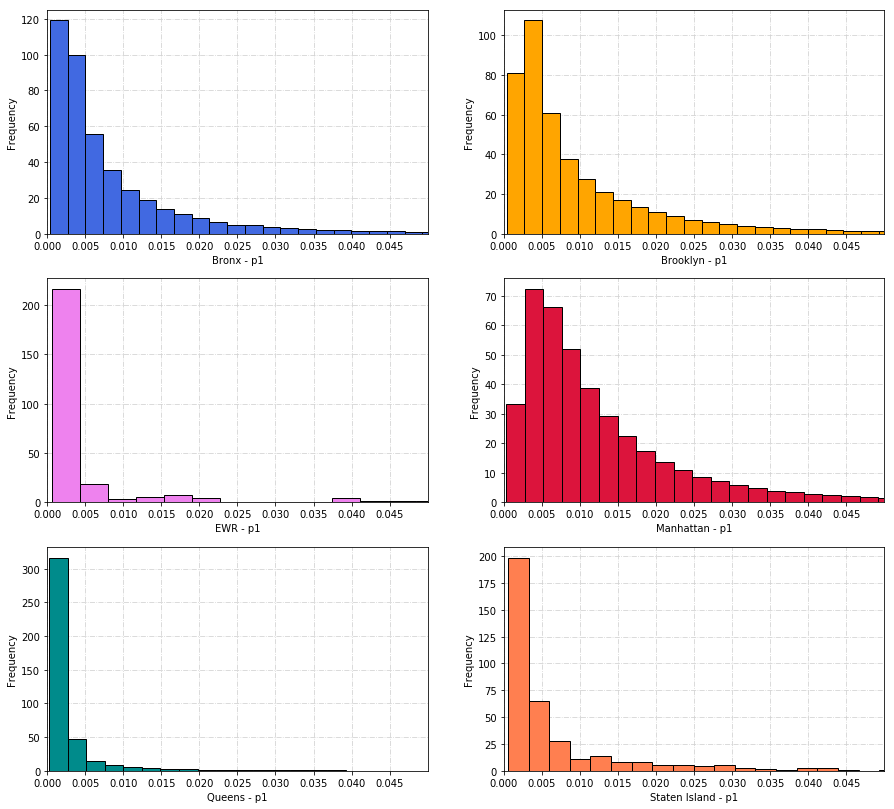

In [16]:
#plot p1 for each borough
functions.plot_p1 (boro_dict, borough_lst)

In [17]:
# make p_value_table
functions.p_value_table(boro_dict,borough_lst,'p1')

,Bronx,Brooklyn,EWR,Manhattan,Queens,Staten Island
Bronx,1,0,0.007,0,0,0
Brooklyn,0,1,0,0,0,0
EWR,0.007,0,1,0,0,0.826
Manhattan,0,0,0,1,0,0
Queens,0,0,0,0,1,0
Staten Island,0,0,0.826,0,0,1
